In [64]:
import time 
start_time = time.time()
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# pd.set_option('max_columns', None)

RANDOM_STATE = 1234

In [65]:
columns = ["poisonous", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", 
           "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
           "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
           "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
df = pd.read_csv("D:/Work/Mushroom/Data/agaricus-lepiota.data", names=columns)
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [66]:
mappings = list()

le = LabelEncoder()
length_cols = len(df.columns)
for i in range(length_cols):
  df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
  mappings_dict = {index: label for index, label in enumerate(le.classes_)}
  mappings.append(mappings_dict)


In [67]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [68]:
X = df.drop(['poisonous'], axis=1)
y = df['poisonous']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (8124, 22)
y shape: (8124,)


In [69]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [70]:
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.8, random_state=RANDOM_STATE)
X_test, X_valid, y_test, y_valid = train_test_split(X_, y_, train_size=0.5, random_state=RANDOM_STATE)
del X_, y_

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"X_valid shape: {X_valid.shape}, y_valid shape: {y_valid.shape}")

X_train shape: (6499, 22), y_train shape: (6499,)
X_test shape: (812, 22), y_test shape: (812,)
X_valid shape: (813, 22), y_valid shape: (813,)


In [71]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

In [72]:
np.sum(y) / len(y)

0.48202855736090594

In [73]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [74]:
print(f"Logistic Regression Accuracy: {log_model.score(X_test, y_test)}")
print(f"SVM Accuracy: {svm_model.score(X_test, y_test)}")
print(f"Neural Network Accuracy: {nn_model.score(X_test, y_test)}")

Logistic Regression Accuracy: 0.9568965517241379
SVM Accuracy: 1.0
Neural Network Accuracy: 1.0


In [75]:
model = XGBClassifier(random_state=RANDOM_STATE)

param_grid = {
  "max_depth": [1, 2, 3, 4, 5, 10, 20, 50],
  "learning_rate": [1e-5, 1e-4, 1e-3, 1e-2],
  "n_estimators": [5, 10, 20, 40, 70, 100],
  # "gamma": [0.001, 0.01, 0.1, 1]
}

grid_model = GridSearchCV(
  estimator=model,
  param_grid=param_grid,
  scoring='accuracy',
  refit='accuracy',
  cv=3,
  n_jobs=10,
  verbose=2,
  return_train_score=True
)

grid_result = grid_model.fit(X_train, y_train, verbose=2)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [76]:
print(grid_model.best_params_)
print("XGBoost Accuracy: ", grid_model.best_score_)

{'learning_rate': 0.001, 'max_depth': 10, 'n_estimators': 100}
XGBoost Accuracy:  1.0


In [77]:
result_df = pd.DataFrame(grid_model.cv_results_)
result_df = result_df.sort_values("rank_test_score")
result_df.to_csv("xgboost_parameters.csv")

<Axes: >

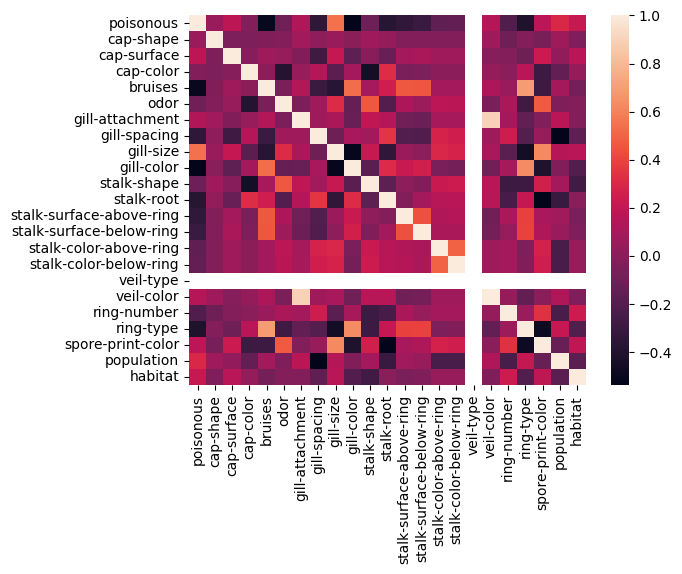

In [78]:
corr = df.corr()

sns.heatmap(corr)

In [79]:
print("Time", time.time() - start_time)

Time 12.477241277694702
